In [1]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv

# load environment varibles
load_dotenv()

True

In [3]:
import sys
sys.path.append("/Users/mac/Desktop/chat_with_data/dagpt")
from src.models.llms import load_llm

MODEL_NAME = "gpt-4o-mini"
llm = load_llm(model_name=MODEL_NAME)
llm

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x1526cdbb0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x153006c70>, root_client=<openai.OpenAI object at 0x1527ad280>, root_async_client=<openai.AsyncOpenAI object at 0x1526cdeb0>, model_name='gpt-4o-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'), max_tokens=1000)

In [4]:
llm.invoke("Hello. Who are you?")

AIMessage(content="Hello! I’m an AI language model created by OpenAI. I'm here to assist you with information, answer questions, and engage in conversation. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 13, 'total_tokens': 49, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_e2bde53e6e', 'finish_reason': 'stop', 'logprobs': None}, id='run-5fd04e5d-21fe-4fa4-afeb-8a56437b0de3-0', usage_metadata={'input_tokens': 13, 'output_tokens': 36, 'total_tokens': 49, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

In [5]:
df = pd.read_csv("../data/raw/sales.csv")
da_agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    agent_type="tool-calling",
    allow_dangerous_code=True,
    verbose=True,
    return_intermediate_steps=True,
)
da_agent

AgentExecutor(verbose=True, agent=RunnableMultiActionAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: message_formatter(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[l

In [6]:
query = "Describe this data"
response = da_agent(query)

/var/folders/82/hv_1k2g54vg4xxdg44wz95vm0000gn/T/ipykernel_53230/168530141.py:2: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = da_agent(query)




> Entering new AgentExecutor chain...
The provided data appears to be a sample of sales order records from a retail or e-commerce business. Here’s a breakdown of the columns in the dataframe:

1. **SalesOrderNumber**: A unique identifier for each sales order. This number helps track individual orders.

2. **SalesOrderLineNumber**: This indicates the line item number within a sales order. It allows for multiple items to be associated with a single sales order.

3. **OrderDate**: The date when the order was placed. This is important for tracking sales over time and for inventory management.

4. **CustomerName**: The name of the customer who placed the order. This helps in identifying who made the purchase.

5. **EmailAddress**: The email address of the customer. This can be used for communication regarding the order, such as confirmations or shipping updates.

6. **Item**: The name or description of the item purchased. This provides details about what the customer ordered.

7. **Quanti

In [12]:
print(response["intermediate_steps"][-1][0].tool_input['query'])

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined as per the provided data
plt.figure(figsize=(10, 6))
plt.scatter(df['UnitPrice'], df['TaxAmount'], alpha=0.5)
plt.title('Scatter Plot of Unit Price vs Tax Amount')
plt.xlabel('Unit Price')
plt.ylabel('Tax Amount')
plt.grid(True)
plt.show()




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Assuming df is already defined as per the provided data\nplt.figure(figsize=(10, 6))\nplt.scatter(df['UnitPrice'], df['TaxAmount'], alpha=0.5)\nplt.title('Scatter Plot of Unit Price vs Tax Amount')\nplt.xlabel('Unit Price')\nplt.ylabel('Tax Amount')\nplt.grid(True)\nplt.show()"}`




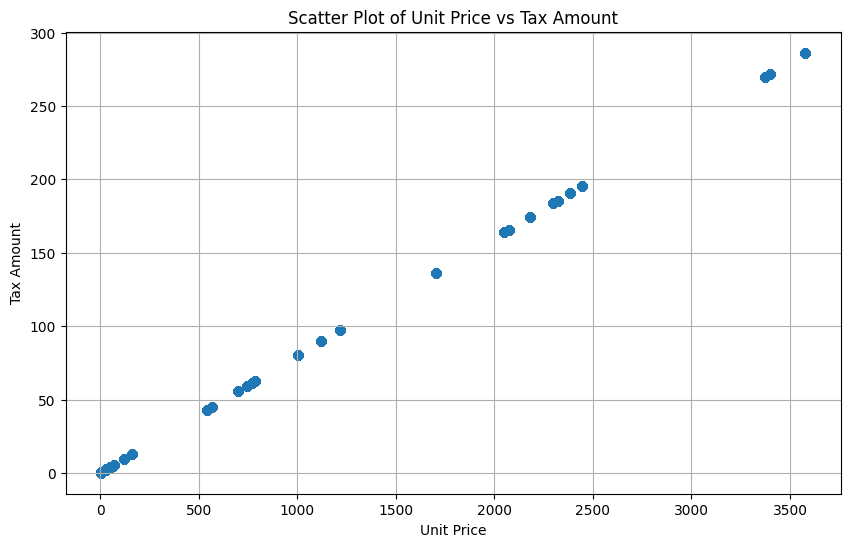

The scatter plot of Unit Price versus Tax Amount has been generated successfully. You can visualize the relationship between these two variables in the plot. If you need any further analysis or modifications, let me know!

> Finished chain.


In [8]:
query = "plot scatter plot of unitprice and taxamount"
response = da_agent(query)

In [13]:
print(response["intermediate_steps"][-1][0].tool_input['query'])

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined as per the provided data
plt.figure(figsize=(10, 6))
plt.scatter(df['UnitPrice'], df['TaxAmount'], alpha=0.5)
plt.title('Scatter Plot of Unit Price vs Tax Amount')
plt.xlabel('Unit Price')
plt.ylabel('Tax Amount')
plt.grid(True)
plt.show()
